1. Metadata
Census marital status dataset

Sr.No.: continuous (not used)

AgeGroup: [15-19], [20-24], [25-29], [30-34], [35-39], [40-44], [45-49], [50-54], [55-59], [60-64], [65-69] ,[70-74], [75+], and some other tags that      we will not use because their presence is very small and they only pollute the data.

Country: Norway, Hungary, Iceland, Sweden, Denmark, Afghanistan, 'Albania' 'Algeria' 'American Samoa' 'Angola' 'Anguilla' 'Antigua and Barbuda'           'Argentina' 'Armenia' 'Aruba' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin'       'Bermuda' 'Bhutan' 'Bolivia (Plurinational State of)' 'Bosnia and Herzegovina' 'Botswana' 'Brazil', ..., Zimbabwe.

Sex: Male, Female

DataProcess: 'Survey' 'Census' 'Estimate' 'Multiround surv' 'Dual record' 'GGS'

Data Collection (Start Year): continuous.

Data Collection (End Year): continuous.

Data Source: 'National statistics' 'UNSD' 'MICS' 'DHS_HH' 'DHS_STATcompiler' 'US Census Bureau' 'MICS_HH' 'RHS' 'PAPCHILD' 'PAPFAM' 'INED' 'GGS'
  'Eurostat' 'GFHS' 'IPUMS'

MaritalStatus: Divorced' 'Married' 'Single' 'Widowed' 'Divorced or Separated' 'Separated' 'Never married' 'Not in union' 'Not living together'
  'Married or Living together' 'Widowed or divorced' 'Living together' 'Consensual union' 'Ever married' 'Currently not married' 'Consensual union, 
  not living together' 'Married or in consensual union', ... (but we separate the data into Divorced and Not Divorced)

In [353]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

In [354]:
# Define the column names as a list
column_names = ['Sr.No.', 'Country', 'AgeGroup', 'Sex', 'MaritalStatus', 'DataProcess', 
                'Data Collection (Start Year)', 'Data Collection (End Year)', 'Data Source']

2. Load Dataset

In [391]:
dataset = pd.read_csv("World Marriage Dataset.csv", skiprows=1, names = column_names, sep = ",", skipinitialspace=True, low_memory=False)
dataset.head()

,Sr.No.,Country,AgeGroup,Sex,MaritalStatus,DataProcess,Data Collection (Start Year),Data Collection (End Year),Data Source
0,1,Afghanistan,[15-19],Man,Divorced,Survey,1972,1974,National statistics
1,2,Afghanistan,[20-24],Man,Divorced,Survey,1972,1974,National statistics
2,3,Afghanistan,[25-29],Man,Divorced,Survey,1972,1974,National statistics
3,4,Afghanistan,[30-34],Man,Divorced,Survey,1972,1974,National statistics
4,5,Afghanistan,[35-39],Man,Divorced,Survey,1972,1974,National statistics


In [394]:
print(dataset['Data Source'].unique())

['National statistics' 'UNSD' 'MICS' 'DHS_HH' 'DHS_STATcompiler'
 'US Census Bureau' 'MICS_HH' 'RHS' 'PAPCHILD' 'PAPFAM' 'INED' 'GGS'
 'Eurostat' 'GFHS' 'IPUMS']


In [356]:
valid_age_groups = ['[15-19]', '[20-24]', '[25-29]', '[30-34]', '[35-39]', '[40-44]', '[45-49]', '[50-54]', '[55-59]', '[60-64]', '[65-69]' ,'[70-74]', '[75+]']
dataset = dataset[dataset['AgeGroup'].isin(valid_age_groups)]

dataset['MaritalStatus'] = dataset['MaritalStatus'].apply(lambda x: 'Divorced' if 'Divorced' in x else 'Not Divorced')
dataset.head()

,Sr.No.,Country,AgeGroup,Sex,MaritalStatus,DataProcess,Data Collection (Start Year),Data Collection (End Year),Data Source
0,1,Afghanistan,[15-19],Man,Divorced,Survey,1972,1974,National statistics
1,2,Afghanistan,[20-24],Man,Divorced,Survey,1972,1974,National statistics
2,3,Afghanistan,[25-29],Man,Divorced,Survey,1972,1974,National statistics
3,4,Afghanistan,[30-34],Man,Divorced,Survey,1972,1974,National statistics
4,5,Afghanistan,[35-39],Man,Divorced,Survey,1972,1974,National statistics


In [357]:
# print important information about dataset
print("#Total of samples = ", dataset.shape[0])
print("#Features = ", dataset.shape[1])

#Total of samples =  252510
#Features =  9


In [358]:
# checking the missing values
dataset[dataset.eq("?").any(axis=1)].head()

,Sr.No.,Country,AgeGroup,Sex,MaritalStatus,DataProcess,Data Collection (Start Year),Data Collection (End Year),Data Source


no missing values

3. Descriptive Statistical Analysis

Numerical variables

In [359]:
# list of numerical variables 
numerical_cols = ["Data Collection (Start Year)", "Data Collection (End Year)"]

Histogram with Frequencies

In [360]:
# function to plot distribution for 1 numerical column
def hist_frequencies(data, column, bins):
    sbn.histplot(data[column], color = "blue", bins = bins)
    plt.xlabel(column)
    plt.ylabel("Frequencies")
    plt.title("Histogram distribution for " + column)    
    plt.show()

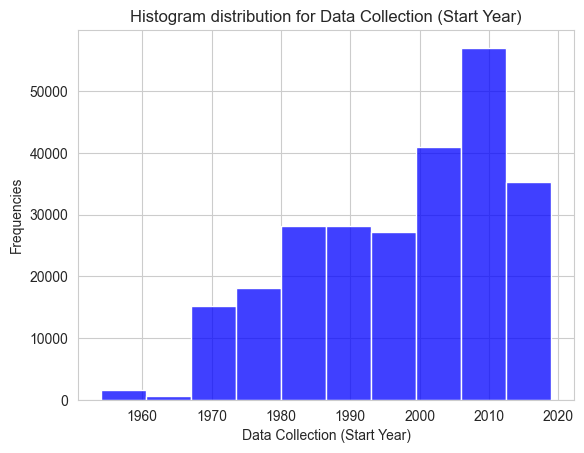

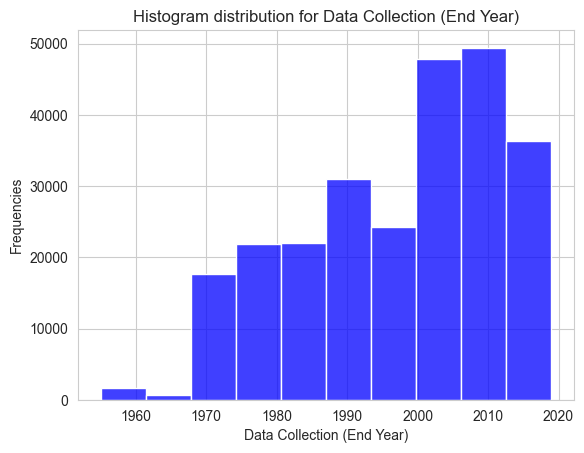

In [361]:
# plot the distribution for each numerical column
for col in numerical_cols:
    hist_frequencies(dataset, col, 10)

These graphs show that the year the survey began is not very different from the year it ended, since the graphs turned out very similar

In [362]:
# function to plot distribution for 1 numerical column
def hist_density(data, column, bins):
    sbn.histplot(data[column], color = "blue", bins = bins, kde = False, stat = "density", alpha = 0.5)
    sbn.kdeplot(data[column], color = "red", linewidth = 2)
    plt.xlabel(column)
    plt.ylabel("Density")
    plt.title("Histogram and KDE for " + column)    
    plt.show()

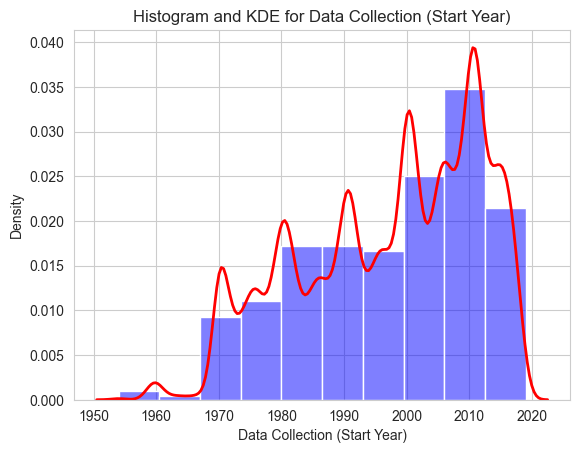

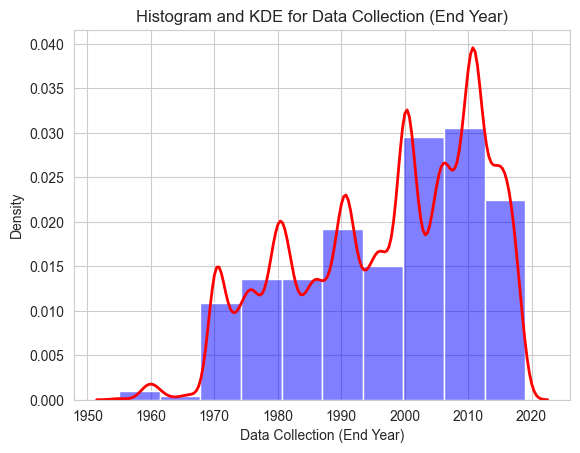

In [363]:
# plot the distribution for each numerical column
for col in numerical_cols:
    hist_density(dataset, col, 10)

The graphs show that there are some jumps in the function that are poorly reflected in the bar graph, but this is not critical

In [364]:
# function to make boxplot
def statistics_nvar(data, numerical_cols):
    # calculate the nrows and ncols for plots
    ncol_plots = 2
    nrow_plots = (len(numerical_cols) + ncol_plots - 1) // ncol_plots
    # create the subplots for specific row and column
    fig, axs = plt.subplots(nrow_plots, ncol_plots, figsize = (16, 4 * nrow_plots))
    axs = axs.flatten()
    # create boxplots for each numerical column
    for i, col in enumerate(numerical_cols):
        sbn.boxplot(data[col], ax = axs[i])
        axs[i].set_title("Box plot for " + col)
    plt.tight_layout()
    plt.show()

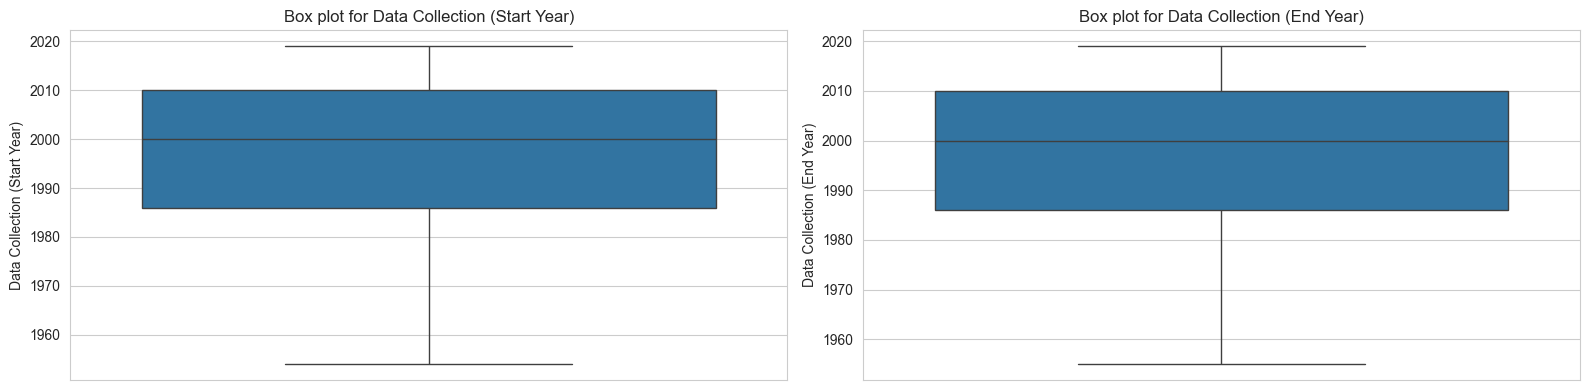

In [365]:
# boxplot for each numerical column
statistics_nvar(dataset, numerical_cols)

In both graphs, the first and third quartiles are at the top of the graph, the median is at around 2000, which suggests that most surveys were conducted at the turn of the century

In [366]:
# statistical information about numerical variables
dataset[numerical_cols].describe()

,Data Collection (Start Year),Data Collection (End Year)
count,252510.000000,252510.000000
mean,1997.284456,1997.384824
std,14.147734,14.189231
min,1954.000000,1955.000000
25%,1986.000000,1986.000000
50%,2000.000000,2000.000000
75%,2010.000000,2010.000000
max,2019.000000,2019.000000


In [367]:
# function to plot correlation between numerical variables
def plot_correlation(data, cols):
    corr = data[cols].corr()
    plt.matshow(corr, cmap = "coolwarm")
    plt.xticks(range(len(cols)), cols, rotation = 90)
    plt.yticks(range(len(cols)), cols)

    # add the correlation values in each cell
    for (i, j), val in np.ndenumerate(corr):
        plt.text(j, i, f"{val:.1f}", ha='center', va='center', color='black')
    plt.title("Correlation Analysis")
    plt.colorbar()    
    plt.show()

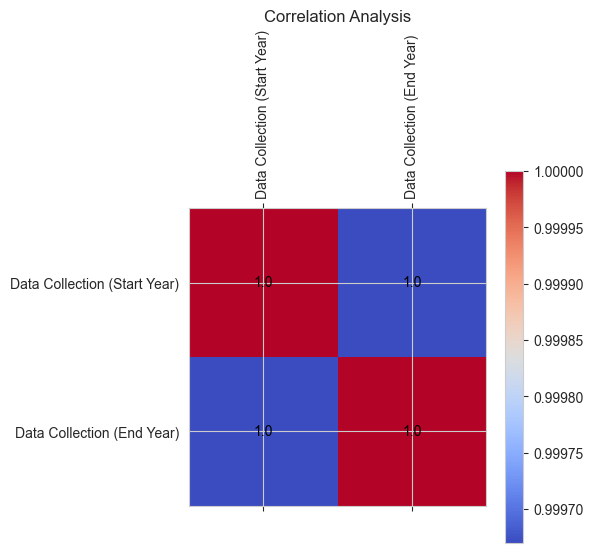

In [324]:
plot_correlation(dataset, numerical_cols)

The correlation between the year the survey began and the year it ended is almost equal to one, which makes it possible to use not all the data, but only half, for example only the Start Year

In [368]:

from scipy.stats import norm

# Calculate the percentile for a specific Z-score
def call_percentile(z):
    percentile = float(round(norm.cdf(z) * 100, 3))
    return percentile

In [369]:
call_percentile(z = -2)

2.275

In [370]:
from scipy import stats

# Function for outliers detection based on percentiles
def outliers_detection(dataset, col, lower_percentile=2.275, upper_percentile=97.725):
    # Calculate the percentiles
    lower_bound = dataset[col].quantile(lower_percentile / 100)
    upper_bound = dataset[col].quantile(upper_percentile / 100)
    
    # Filter out the outliers
    outliers = dataset[(dataset[col] < lower_bound) | (dataset[col] > upper_bound)]
    
    return outliers

In [371]:
outliers_detection(dataset, "Data Collection (Start Year)").head()

,Sr.No.,Country,AgeGroup,Sex,MaritalStatus,DataProcess,Data Collection (Start Year),Data Collection (End Year),Data Source
4282,4283,Armenia,[20-24],Man,Not Divorced,Census,1959,1959,National statistics
4283,4284,Armenia,[25-29],Man,Not Divorced,Census,1959,1959,National statistics
4284,4285,Armenia,[30-34],Man,Not Divorced,Census,1959,1959,National statistics
4285,4286,Armenia,[35-39],Man,Not Divorced,Census,1959,1959,National statistics
4286,4287,Armenia,[40-44],Man,Not Divorced,Census,1959,1959,National statistics


In [372]:
# cycle to check the number of outliers in each numerical column
for col in numerical_cols:
    print("\n*** Outliers detection in " + col + " ***")
    lst_outliers = outliers_detection(dataset, col)
    print(f"#samples outlier to distribution = {len(lst_outliers)}")
    print(f"%outliers = {round(100* len(lst_outliers)/len(dataset), 2)} %")


*** Outliers detection in Data Collection (Start Year) ***
#samples outlier to distribution = 6397
%outliers = 2.53 %

*** Outliers detection in Data Collection (End Year) ***
#samples outlier to distribution = 6980
%outliers = 2.76 %


Categorical Variables

In [373]:
# list of categorical variables
categorical_vars = list(set(dataset.columns) - set(numerical_cols))
categorical_vars.remove('Sr.No.')
categorical_vars

['MaritalStatus', 'AgeGroup', 'Data Source', 'DataProcess', 'Country', 'Sex']

In [374]:
# cycle to calculate number of instances in each categorical column
for col in categorical_vars:
    print("\n***** " + col + " ******")
    print(dataset[col].value_counts())


***** MaritalStatus ******
MaritalStatus
Not Divorced    200086
Divorced         52424
Name: count, dtype: int64

***** AgeGroup ******
AgeGroup
[25-29]    22666
[20-24]    22580
[30-34]    22560
[35-39]    22466
[40-44]    22444
[45-49]    22077
[15-19]    21496
[50-54]    18213
[55-59]    17980
[60-64]    16923
[65-69]    14764
[75+]      14370
[70-74]    13971
Name: count, dtype: int64

***** Data Source ******
Data Source
UNSD                   162529
DHS_STATcompiler        20110
DHS_HH                  18239
National statistics     17792
US Census Bureau         7290
MICS                     6727
MICS_HH                  6565
INED                     6194
Eurostat                 2873
GGS                      1602
IPUMS                    1406
GFHS                      400
PAPFAM                    352
RHS                       227
PAPCHILD                  204
Name: count, dtype: int64

***** DataProcess ******
DataProcess
Census             98020
Estimate           85686
Surve

Bar chart - Analysis of absolute frequencies

We display only the 30 most popular values so that the graph looks readable

In [375]:
# function to plot bar chart for absolute frequencies in 1 categorical column
def plot_barchart(dataset, col):
    results = dataset[col].value_counts().head(30)
    sbn.barplot(x = results.values.tolist(), y = results.index.tolist(), orient = "y")
    plt.title("Statistical analysis by " + col)
    plt.show()

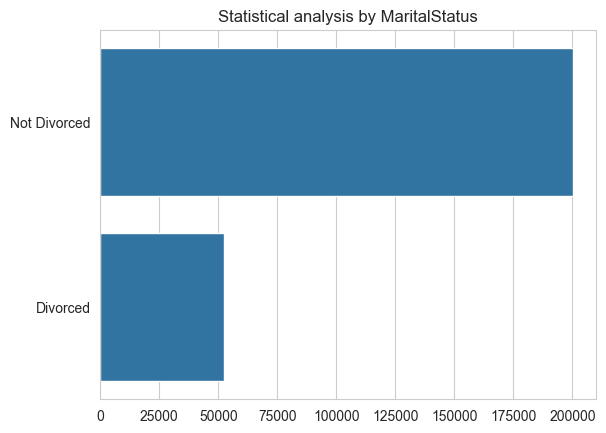

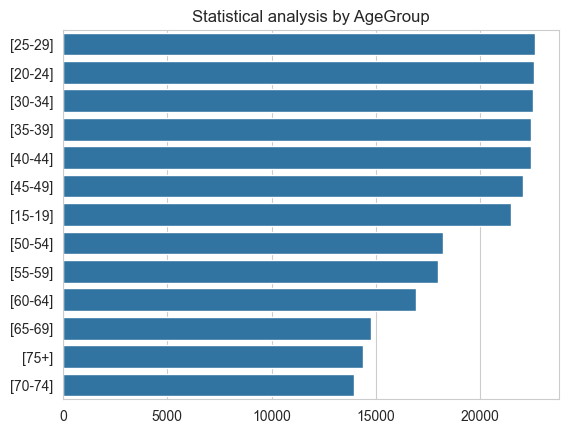

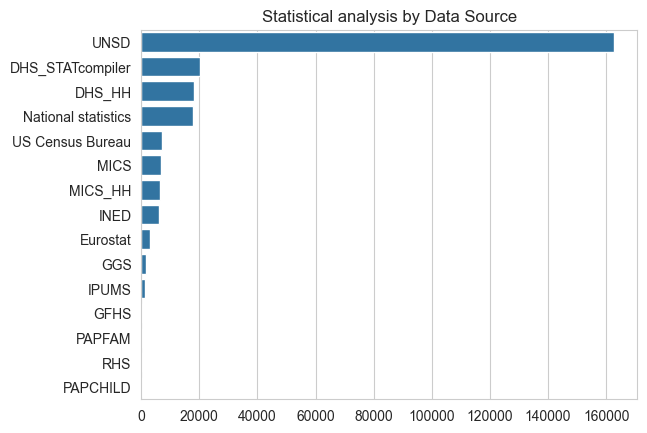

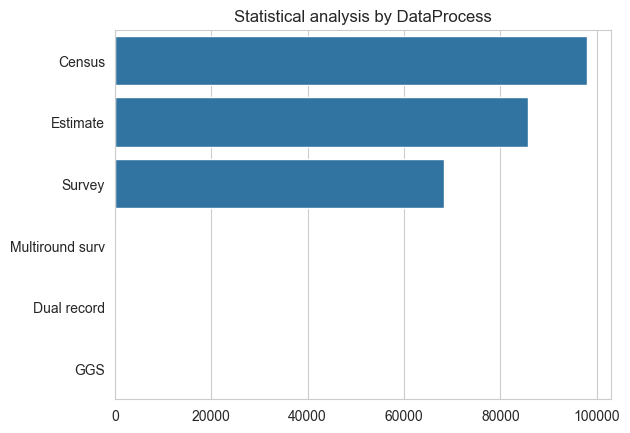

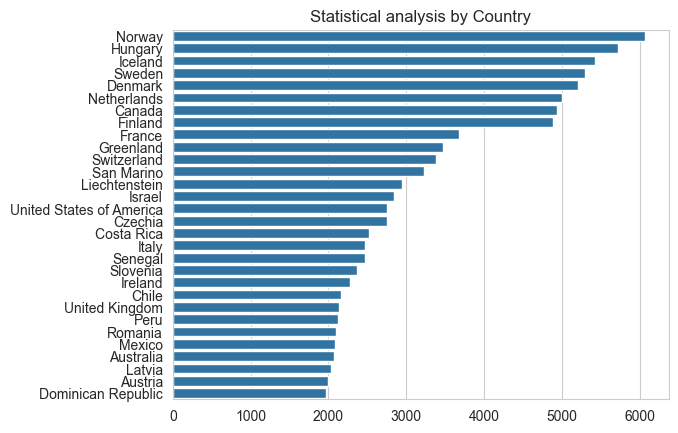

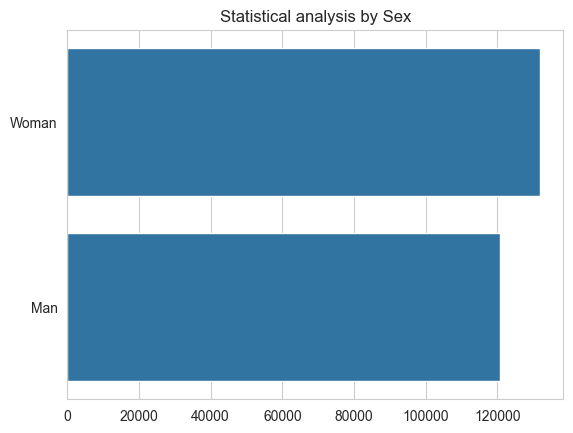

In [376]:
# cycle to plot bar chart for each categorical column
for col in categorical_vars:
    plot_barchart(dataset, col)

- 4 times less divorced than not divorced
- the sample by year is approximately the same, but there is slightly less data for people over 50
- almost all data from UNSD
- Census, Estimate, Survey these are the three main processes for obtaining data
- the most data is from Norway, Hungary, Iceland and Sweden, more than 5000. From other countries less than 4000
- Slightly more women than men took part in the survey

Pie Chart - Analysis of relative frequencies

In [377]:
# function to plot pie chart for relative frequencies in 1 categorical column
def plot_piechart(dataset, col):
    # count the #samples for each categogy
    results = dataset[col].value_counts()
    # calculate the relative frequencies
    total_samples = results.sum()
    rel_freq = results/total_samples
    sbn.set_style("whitegrid")
    plt.figure(figsize=(6,6))
    plt.pie(rel_freq.values.tolist(), labels = rel_freq.index.tolist(), autopct='%1.1f%%')
    plt.title("Relative frequency analysis by " + col)
    plt.show()

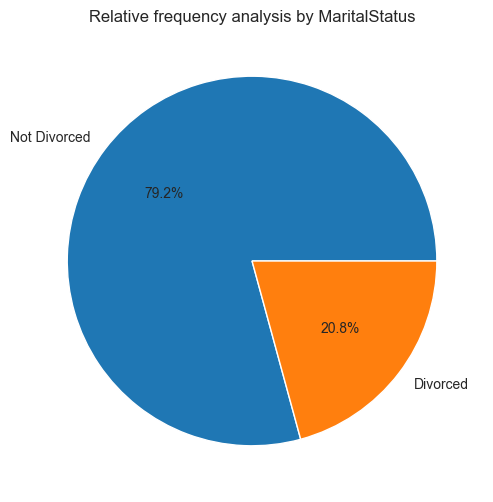

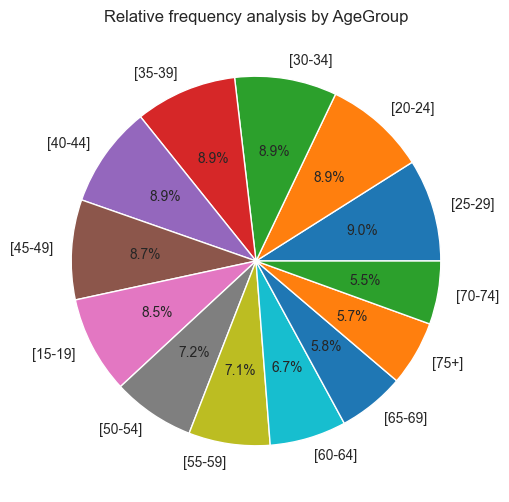

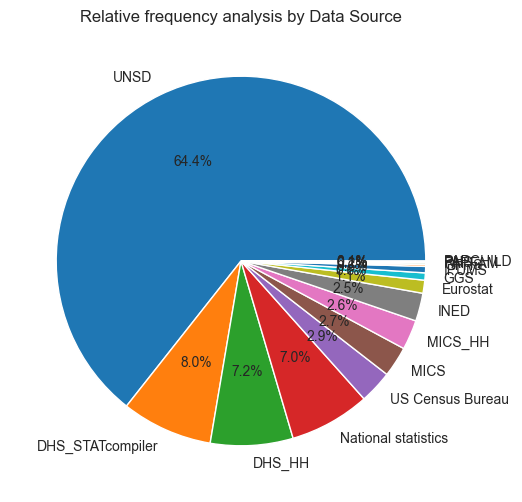

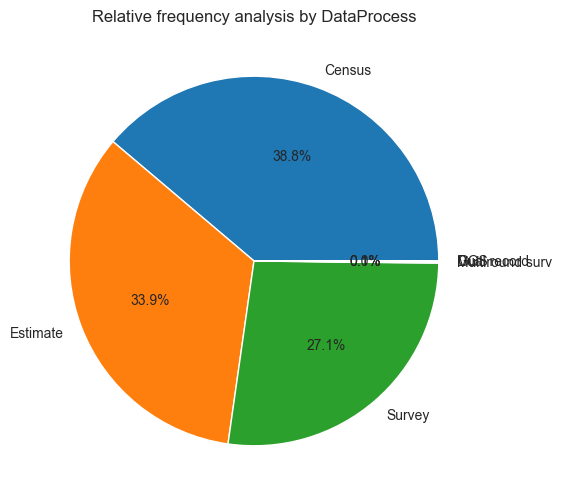

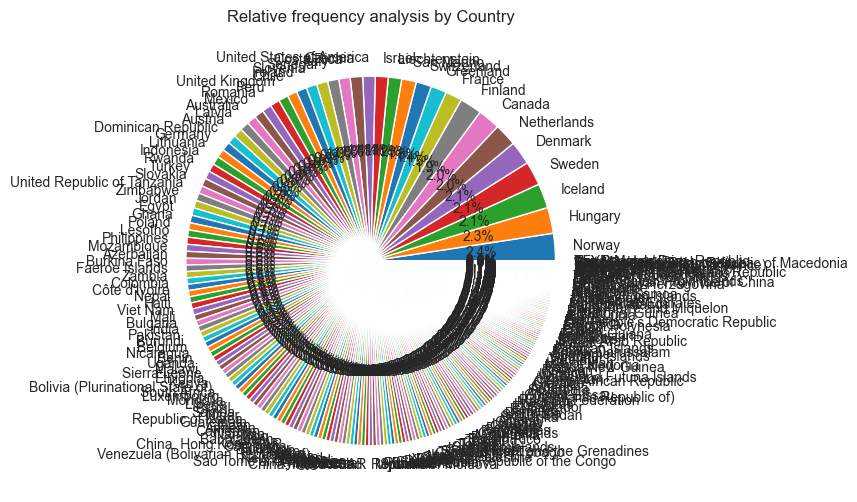

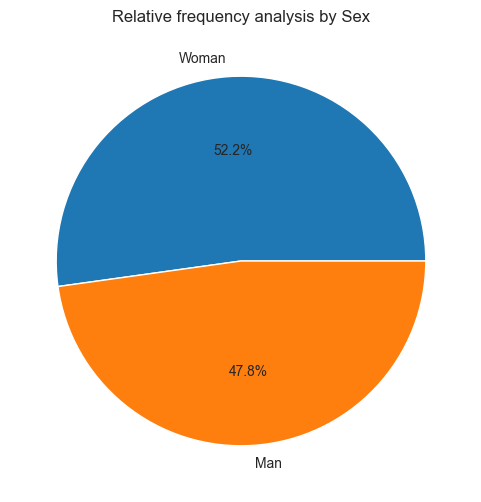

In [378]:
# cycle to plot pie chart for each categorical column
for col in categorical_vars:
    plot_piechart(dataset, col)

The relative graphs once again confirm the previous comment. They show better how much larger the UNSD is

Statistical Analysis for subgroups

In [379]:
# create groups organized by sex and Marital Status
group_sex_income = dataset.groupby(["Sex", "MaritalStatus"]).size().reset_index(name = "samples")
print(group_sex_income)

     Sex MaritalStatus  samples
0    Man      Divorced    25211
1    Man  Not Divorced    95471
2  Woman      Divorced    27213
3  Woman  Not Divorced   104615


In [380]:
# function to plot absolute frequencies for groups
def plot_absfreq_groups(group, g1, g2):
    sbn.barplot(data = group, x = g1, y = "samples", hue = g2, palette = "pastel")
    plt.xlabel('Sex')
    plt.ylabel('Absolute Frequencies')
    plt.title('Bar Chart of Absolute Frequencies by Sex and Divorce rate')
    plt.tight_layout()
    plt.show()

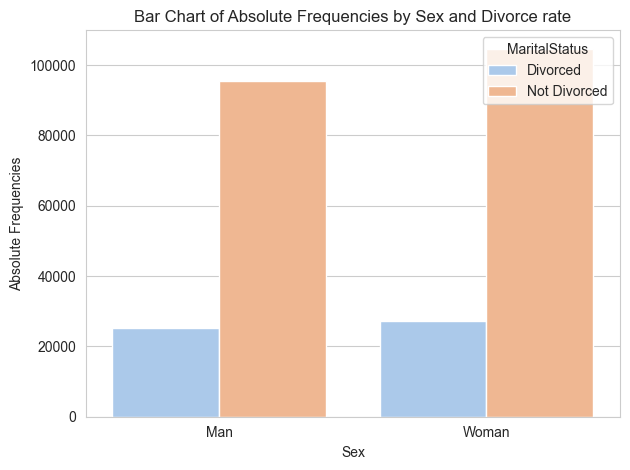

In [381]:
plot_absfreq_groups(group_sex_income, "Sex", "MaritalStatus")

The ratio of divorced men to non-divorced men is approximately equal to that of women.
It’s predictable, it’s true that a divorce requires both a man and a woman

In [382]:
# function to plot relative frequencies for groups
def plot_relfreq_groups(group, g1, g2):
    labels = group[g1] + ' ' + group[g2]
    sizes = group["samples"]
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    plt.axis('equal')
    plt.title('Pie Chart of Relative Frequencies by Sex and Divorce rate')
    plt.show()

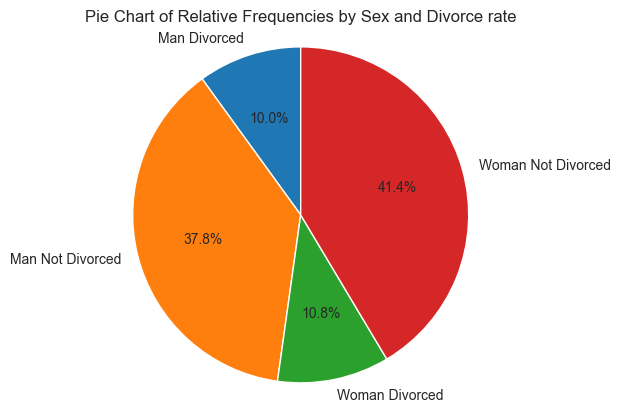

In [383]:
plot_relfreq_groups(group_sex_income, "Sex", "MaritalStatus")

confirmation of the previous comment, besides it is clear that there is a little more data on women

In [384]:
# create groups organized by Age Group and Marital Status
group_sex_income = dataset.groupby(["AgeGroup", "MaritalStatus"]).size().reset_index(name = "samples")
print(group_sex_income)

   AgeGroup MaritalStatus  samples
0   [15-19]      Divorced     4338
1   [15-19]  Not Divorced    17158
2   [20-24]      Divorced     4594
3   [20-24]  Not Divorced    17986
4   [25-29]      Divorced     4625
5   [25-29]  Not Divorced    18041
6   [30-34]      Divorced     4618
7   [30-34]  Not Divorced    17942
8   [35-39]      Divorced     4601
9   [35-39]  Not Divorced    17865
10  [40-44]      Divorced     4594
11  [40-44]  Not Divorced    17850
12  [45-49]      Divorced     4529
13  [45-49]  Not Divorced    17548
14  [50-54]      Divorced     3849
15  [50-54]  Not Divorced    14364
16  [55-59]      Divorced     3805
17  [55-59]  Not Divorced    14175
18  [60-64]      Divorced     3627
19  [60-64]  Not Divorced    13296
20  [65-69]      Divorced     3171
21  [65-69]  Not Divorced    11593
22  [70-74]      Divorced     2995
23  [70-74]  Not Divorced    10976
24    [75+]      Divorced     3078
25    [75+]  Not Divorced    11292


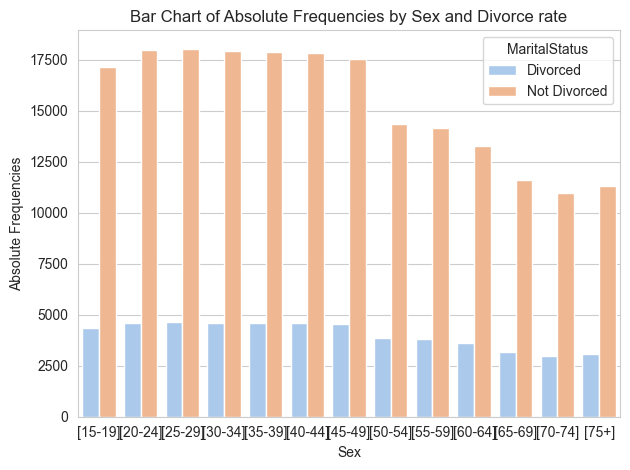

In [386]:
plot_absfreq_groups(group_sex_income, "AgeGroup", "MaritalStatus")

This graph shows that in modern ages, surprisingly, the number of divorced people is not much different from older people.
And after that the number of people with divorced status remains at approximately the same level.
Apparently the number of divorces in each age range is approximately the same as the number of new marriages

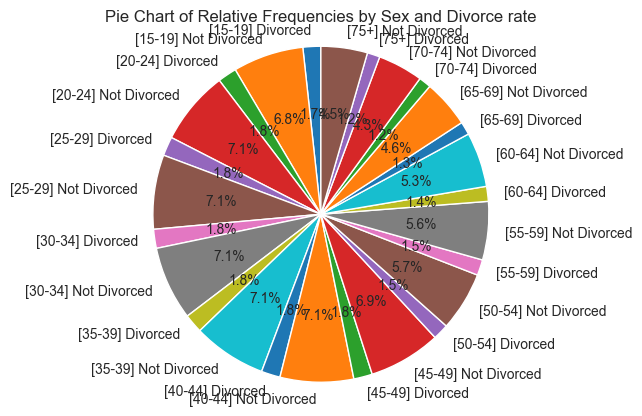

In [387]:
plot_relfreq_groups(group_sex_income, "AgeGroup", "MaritalStatus")

It can be seen that the percentage of divorced people between the ages of 15 and 50 is the same, the further decline is associated with a smaller number of older people surveyed, and perhaps this is due to the death of a certain percentage of people who have reached 50 years of age. but despite this, the relative number of divorced people to non-divorced people remains